# DATA LOGGING USING TENSORBOARD

In [1]:
# Import Depedencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import import_ipynb
import Utils
from tensorboard import notebook
import datetime

2025-01-25 21:36:04.210378: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-25 21:36:04.210407: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-25 21:36:04.210410: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-25 21:36:04.210425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-25 21:36:04.210436: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [2]:
# Tensorboard Callback
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
LOG_DIR = "./logs/" + CURRENT_TIME
METRICS_DIR = LOG_DIR + "/metrics"
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

# Writer to log Extra Things
trainWriter = tf.summary.create_file_writer(METRICS_DIR)

In [21]:
# Defining Scheduler for the Callback
def scheduler(epoch, lr):
    if epoch<3:
        learningRate = lr
    else:
        learningRate = float(lr * tf.math.exp(-0.1))
    with trainWriter.as_default():
        tf.summary.scalar('Learning Rate', data=learningRate, step=epoch)
    return learningRate

learningrateSchedulerCallback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)

In [22]:
Utils.model.fit(Utils.trainDataset, validation_data=Utils.valDataset, epochs=5, verbose=1, callbacks=[learningrateSchedulerCallback, tensorboardCallback])


Epoch 1: LearningRateScheduler setting learning rate to 0.00670319888740778.
Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - auc: 0.9637 - binary_accuracy: 0.9177 - false_negatives: 311.3217 - false_positives: 616.5435 - loss: 0.2672 - precision: 0.8974 - recall: 0.9444 - true_negatives: 4902.3071 - true_positives: 5225.7754 - val_auc: 0.9547 - val_binary_accuracy: 0.9299 - val_false_negatives: 113.0000 - val_false_positives: 80.0000 - val_loss: 0.4098 - val_precision: 0.9410 - val_recall: 0.9186 - val_true_negatives: 1287.0000 - val_true_positives: 1275.0000 - learning_rate: 0.0067

Epoch 2: LearningRateScheduler setting learning rate to 0.00670319888740778.
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 52s 75ms/step - auc: 0.9656 - binary_accuracy: 0.9178 - false_negatives: 315.8986 - false_positives: 592.0073 - loss: 0.2558 - precision: 0.8984 - recall: 0.9434 - true_negatives: 4926.7915 - true_positives: 5221.2505 - val_auc: 0.9312 - val_binary_accuracy: 0.9053 - val_false_negativ

In [23]:
notebook.start("--logdir logs")

Reusing TensorBoard on port 6007 (pid 38203), started 0:56:12 ago. (Use '!kill 38203' to kill it.)

## Data Logging With Custom Training Loop

In [24]:
# Custom Binary Cross-Entropy Loss
def customBCE(yTrue, yPred):
    bce = tf.keras.losses.BinaryCrossentropy()
    return bce(yTrue, yPred)

In [25]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.01)
METRIC = tf.keras.metrics.BinaryAccuracy()
METRIC_VAL = tf.keras.metrics.BinaryAccuracy()
EPOCHS = 3

@tf.function # Converts to graph mode -> faster
def trainingBlock(xBatch, yBatch):
    with tf.GradientTape() as recorder: # Record Gradients
        yPred = Utils.model(xBatch, training=True)
        loss = customBCE(yBatch, yPred)
    partialDerivatives = recorder.gradient(loss, Utils.model.trainable_weights)
    OPTIMIZER.apply_gradients(zip(partialDerivatives, Utils.model.trainable_weights))
    METRIC.update_state(yBatch, yPred)

    return loss

@tf.function
def valBlock(xBatchVal, yBatchVal):
    yPredVal = Utils.model(xBatchVal, training=False)
    lossVal = customBCE(yBatchVal, yPredVal)
    METRIC_VAL.update_state(yBatchVal, yPredVal)

    return lossVal


In [30]:
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
LOG_DIR = "./logs/" + CURRENT_TIME
CUSTOM_TRAIN_DIR = LOG_DIR + "/custom/train"
CUSTOM_VAL_DIR = LOG_DIR + "/custom/val"
customTrainWriter = tf.summary.create_file_writer(CUSTOM_TRAIN_DIR)
customValWriter = tf.summary.create_file_writer(CUSTOM_VAL_DIR)

In [31]:
def trainModel(model, lossFunction, metric, valMetric, optimizer, trainDataset, valDataset, epochs=EPOCHS):
    for epoch in range(epochs):
        print("Training For Epoch : ", epoch+1)
        print("\n")
        for step, (xBatch, yBatch) in enumerate(trainDataset):
            loss = trainingBlock(xBatch, yBatch)
        print("Training Loss : ", loss)
        print("The Accuracy is : ", METRIC.result())
        print("\n")
        with customTrainWriter.as_default():
            tf.summary.scalar('Training Loss', data=loss, step=epoch)
            tf.summary.scalar('Training Accuracy', data=METRIC.result(), step=epoch)
        METRIC.reset_state()
        for (xBatchVal, yBatchVal) in valDataset:
            lossVal = valBlock(xBatchVal, yBatchVal)
        print("Validation Loss : ", lossVal)
        print("The Validation Accuracy is : ", METRIC_VAL.result())
        print("\n")
        with customValWriter.as_default():
            tf.summary.scalar('Validation Loss', data=lossVal, step=epoch)
            tf.summary.scalar('Validation Accuracy', data=METRIC_VAL.result(), step=epoch)
        METRIC_VAL.reset_state()
    print("TRAINING COMPLETE !!")

In [32]:
trainModel(Utils.model, customBCE, METRIC, METRIC_VAL, OPTIMIZER, Utils.trainDataset, Utils.valDataset, 3)

Training For Epoch :  1




2025-01-25 21:19:59.153780: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss :  tf.Tensor(0.31580058, shape=(), dtype=float32)
The Accuracy is :  tf.Tensor(0.9155313, shape=(), dtype=float32)




2025-01-25 21:20:01.772875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss :  tf.Tensor(0.18390785, shape=(), dtype=float32)
The Validation Accuracy is :  tf.Tensor(0.9139746, shape=(), dtype=float32)


Training For Epoch :  2




2025-01-25 21:20:34.603423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss :  tf.Tensor(0.19698392, shape=(), dtype=float32)
The Accuracy is :  tf.Tensor(0.91045994, shape=(), dtype=float32)




2025-01-25 21:20:36.748834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss :  tf.Tensor(0.08545255, shape=(), dtype=float32)
The Validation Accuracy is :  tf.Tensor(0.9288566, shape=(), dtype=float32)


Training For Epoch :  3




2025-01-25 21:21:09.469306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training Loss :  tf.Tensor(0.27662182, shape=(), dtype=float32)
The Accuracy is :  tf.Tensor(0.9160845, shape=(), dtype=float32)


Validation Loss :  tf.Tensor(1.3841553, shape=(), dtype=float32)
The Validation Accuracy is :  tf.Tensor(0.92704177, shape=(), dtype=float32)


TRAINING COMPLETE !!


2025-01-25 21:21:11.729319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [33]:
notebook.start("--logdir logs")

Reusing TensorBoard on port 6007 (pid 38203), started 1:24:35 ago. (Use '!kill 38203' to kill it.)

## Display Image Data Like Confusion Matrix After Each Epoch Using Tensorboard

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import io

In [6]:
IMAGE_DIR = LOG_DIR + "/images"

class LogImageCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        labels = []
        inputs = []
        for x, y in Utils.testDataset.as_numpy_iterator():
            for i in range(len(y)):
                labels.append(y[i])
                inputs.append(x[i])
        labels = np.array(labels)
        inputs = np.array(inputs)
        predicted = Utils.model.predict(inputs)
        predicted = predicted[:, 0]
        threshold = 0.5 # Default Value
        cm = confusion_matrix(labels, predicted>threshold)
        # Plotting the Confusion Matrix
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True)
        plt.title("Confusion Matrix - {}".format(threshold))
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        buffer = io.BytesIO()
        plt.savefig(buffer, format='png')
        image = tf.image.decode_png(buffer.getvalue(), channels=3)
        image = tf.expand_dims(image, axis=0)

        imageWriter = tf.summary.create_file_writer(IMAGE_DIR)

        with imageWriter.as_default():
            tf.summary.image("Training Data", data=image, step=epoch)

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - auc: 0.8619 - binary_accuracy: 0.7897 - false_negatives: 715.6647 - false_positives: 1297.0566 - loss: 0.4718 - precision: 0.7650 - recall: 0.8412 - true_negatives: 4213.8940 - true_positives: 4813.3818

2025-01-25 21:39:32.017293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
689/689 ━━━━━━━━━━━━━━━━━━━━ 57s 82ms/step - auc: 0.8620 - binary_accuracy: 0.7898 - false_negatives: 716.2377 - false_positives: 1298.4956 - loss: 0.4717 - precision: 0.7651 - recall: 0.8413 - true_negatives: 4220.4390 - true_positives: 4820.7754 - val_auc: 0.9530 - val_binary_accuracy: 0.9307 - val_false_negatives: 59.0000 - val_false_positives: 132.0000 - val_loss: 0.3495 - val_precision: 0.9102 - val_recall: 0.9578 - val_true_negatives: 1226.0000 - val_true_positives: 1338.0000
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - auc: 0.9414 - binary_accuracy: 0.8989 - false_negatives: 303.4151 - false_positives: 840.8229 - loss: 0.3283 - precision: 0.8647 - recall: 0.9474 - true_negatives: 4669.9683 - true_positives: 5225.7910

2025-01-25 21:40:28.543864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
689/689 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - auc: 0.9414 - binary_accuracy: 0.8989 - false_negatives: 303.8449 - false_positives: 842.0421 - loss: 0.3283 - precision: 0.8647 - recall: 0.9474 - true_negatives: 4676.7349 - true_positives: 5233.3262 - val_auc: 0.9550 - val_binary_accuracy: 0.9274 - val_false_negatives: 67.0000 - val_false_positives: 133.0000 - val_loss: 0.4442 - val_precision: 0.9085 - val_recall: 0.9517 - val_true_negatives: 1234.0000 - val_true_positives: 1321.0000
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - auc: 0.9446 - binary_accuracy: 0.9021 - false_negatives: 302.3614 - false_positives: 800.7315 - loss: 0.3234 - precision: 0.8707 - recall: 0.9460 - true_negatives: 4710.1333 - true_positives: 5226.7705

2025-01-25 21:41:25.144559: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
689/689 ━━━━━━━━━━━━━━━━━━━━ 57s 83ms/step - auc: 0.9446 - binary_accuracy: 0.9021 - false_negatives: 302.8044 - false_positives: 801.9521 - loss: 0.3234 - precision: 0.8706 - recall: 0.9460 - true_negatives: 4716.8984 - true_positives: 5234.2930 - val_auc: 0.9223 - val_binary_accuracy: 0.8962 - val_false_negatives: 58.0000 - val_false_positives: 228.0000 - val_loss: 0.4632 - val_precision: 0.8544 - val_recall: 0.9585 - val_true_negatives: 1131.0000 - val_true_positives: 1338.0000
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - auc: 0.9425 - binary_accuracy: 0.8983 - false_negatives: 310.4978 - false_positives: 855.4557 - loss: 0.3286 - precision: 0.8643 - recall: 0.9465 - true_negatives: 4655.3105 - true_positives: 5218.7329

2025-01-25 21:42:19.940485: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
689/689 ━━━━━━━━━━━━━━━━━━━━ 55s 79ms/step - auc: 0.9425 - binary_accuracy: 0.8983 - false_negatives: 310.9391 - false_positives: 856.7304 - loss: 0.3287 - precision: 0.8643 - recall: 0.9465 - true_negatives: 4662.0220 - true_positives: 5226.2563 - val_auc: 0.9522 - val_binary_accuracy: 0.9107 - val_false_negatives: 69.0000 - val_false_positives: 177.0000 - val_loss: 0.4834 - val_precision: 0.8820 - val_recall: 0.9504 - val_true_negatives: 1186.0000 - val_true_positives: 1323.0000
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - auc: 0.9407 - binary_accuracy: 0.8947 - false_negatives: 307.4035 - false_positives: 877.0435 - loss: 0.3457 - precision: 0.8599 - recall: 0.9448 - true_negatives: 4633.6880 - true_positives: 5221.8623

2025-01-25 21:43:10.100328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 72ms/step - auc: 0.9407 - binary_accuracy: 0.8947 - false_negatives: 307.8478 - false_positives: 878.3435 - loss: 0.3457 - precision: 0.8599 - recall: 0.9448 - true_negatives: 4640.3740 - true_positives: 5229.3828 - val_auc: 0.9499 - val_binary_accuracy: 0.9034 - val_false_negatives: 56.0000 - val_false_positives: 210.0000 - val_loss: 0.4271 - val_precision: 0.8639 - val_recall: 0.9597 - val_true_negatives: 1156.0000 - val_true_positives: 1333.0000


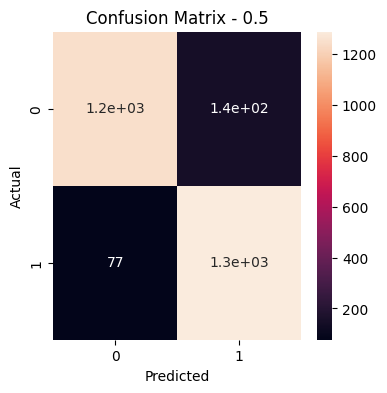

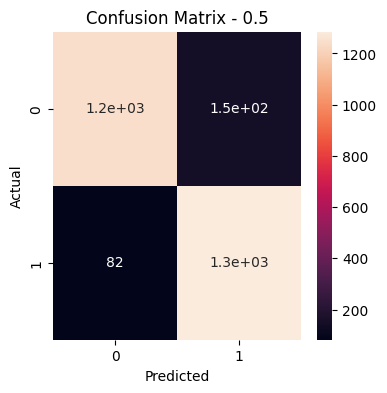

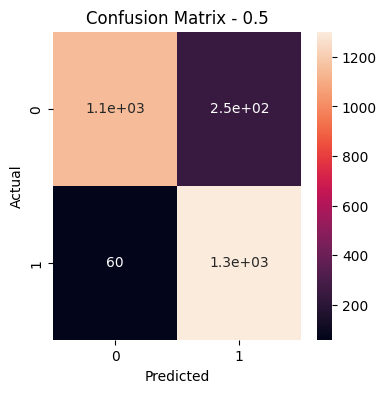

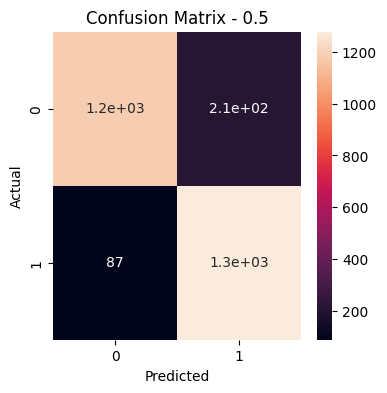

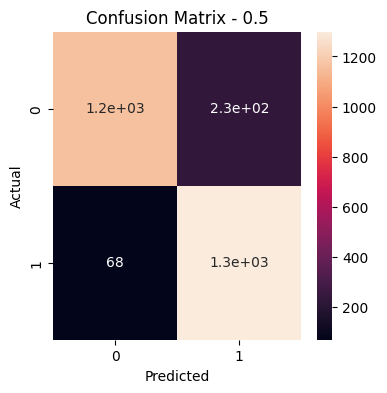

In [7]:
Utils.model.fit(Utils.trainDataset, validation_data=Utils.valDataset, epochs=5, verbose=1, callbacks=[LogImageCallback(), tensorboardCallback])

In [8]:
notebook.start("--logdir logs")

Reusing TensorBoard on port 6007 (pid 38203), started 1:46:23 ago. (Use '!kill 38203' to kill it.)

## Viewing Model's Graphs

In [9]:
!rm -rf ./logs/

In [10]:
# Tensorboard Callback
CURRENT_TIME = datetime.datetime.now().strftime('%d%m%y - %h%m%s')
LOG_DIR = "./logs/" + CURRENT_TIME
METRICS_DIR = LOG_DIR + "/metrics"
tensorboardCallback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

# Writer to log Extra Things
trainWriter = tf.summary.create_file_writer(METRICS_DIR)

In [11]:
Utils.model.fit(Utils.trainDataset, validation_data=Utils.valDataset, epochs=5, verbose=1, callbacks=[tensorboardCallback])

Epoch 1/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/step - auc: 0.9359 - binary_accuracy: 0.8926 - false_negatives: 323.0217 - false_positives: 886.0145 - loss: 0.3621 - precision: 0.8576 - recall: 0.9432 - true_negatives: 4632.8418 - true_positives: 5214.0693 - val_auc: 0.9474 - val_binary_accuracy: 0.9042 - val_false_negatives: 62.0000 - val_false_positives: 202.0000 - val_loss: 0.4137 - val_precision: 0.8681 - val_recall: 0.9555 - val_true_negatives: 1161.0000 - val_true_positives: 1330.0000
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 50s 73ms/step - auc: 0.9399 - binary_accuracy: 0.8947 - false_negatives: 333.2551 - false_positives: 863.2696 - loss: 0.3614 - precision: 0.8627 - recall: 0.9406 - true_negatives: 4655.5000 - true_positives: 5203.9233 - val_auc: 0.9548 - val_binary_accuracy: 0.8907 - val_false_negatives: 50.0000 - val_false_positives: 251.0000 - val_loss: 0.3784 - val_precision: 0.8429 - val_recall: 0.9642 - val_true_negatives: 1107.0000 - val_true_positives: 1347.0000
Epoch 3/

In [12]:
notebook.start("--logdir logs")

Reusing TensorBoard on port 6007 (pid 38203), started 1:54:33 ago. (Use '!kill 38203' to kill it.)